# General case analysis

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv("../data/general/experiment_results.csv")

df_tortuous = df[df['tortosity'] == 'tortuous']
df_moderate = df[df['tortosity'] == 'moderate']
df_simple = df[df['tortosity'] == 'simple']

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]']
df


,Unnamed: 0,vessel,tortosity,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
0,0,simple:0,simple,NaN,80.201342,66.946779,0.759045,NaN,NaN
1,1,simple:1,simple,NaN,80.190174,66.931217,0.644936,NaN,NaN
2,2,simple:2,simple,NaN,80.743243,67.705382,0.961162,NaN,NaN
3,3,simple:3,simple,NaN,84.573503,73.270440,0.535532,NaN,NaN
4,4,simple:4,simple,NaN,81.070746,68.167203,0.622181,NaN,NaN
...,...,...,...,...,...,...,...,...,...
295,295,tortuous:95,tortuous,NaN,78.382582,64.450128,0.722881,NaN,NaN
296,296,tortuous:96,tortuous,NaN,78.606965,64.754098,0.747980,NaN,NaN
297,297,tortuous:97,tortuous,NaN,73.851590,58.543417,1.037406,NaN,NaN
298,298,tortuous:98,tortuous,NaN,77.400295,63.132530,0.854859,NaN,NaN


In [7]:
df.describe()

,Unnamed: 0,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
count,300.000000,0.0,300.000000,300.000000,300.000000,0.0,0.0
mean,149.500000,NaN,78.223696,64.317608,0.829651,NaN,NaN
std,86.746758,NaN,2.723799,3.681968,0.179919,NaN,NaN
min,0.000000,NaN,69.047619,52.727273,0.456028,NaN,NaN
25%,74.750000,NaN,76.434564,61.857561,0.707602,NaN,NaN
50%,149.500000,NaN,78.199383,64.202783,0.812784,NaN,NaN
75%,224.250000,NaN,80.064278,66.755989,0.940516,NaN,NaN
max,299.000000,NaN,84.587814,73.291925,1.668677,NaN,NaN


In [4]:
def t_student(df1, df2, coeff):
    t, p = stats.ttest_ind(df1[coeff], df2[coeff])
    return t, p

In [10]:
t, p = t_student(df_tortuous, df_simple, metrics[2])
t, p

(np.float64(-2.357604705275777), np.float64(0.019368666287838086))

/var/folders/kn/fg_k6n0119d337lwnvhwnmnw0000gn/T/ipykernel_72227/389818507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tortosity', y='Value', data=df_melted[df_melted['Metric'] == metric], palette='Set1')
/var/folders/kn/fg_k6n0119d337lwnvhwnmnw0000gn/T/ipykernel_72227/389818507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tortosity', y='Value', data=df_melted[df_melted['Metric'] == metric], palette='Set1')
/var/folders/kn/fg_k6n0119d337lwnvhwnmnw0000gn/T/ipykernel_72227/389818507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

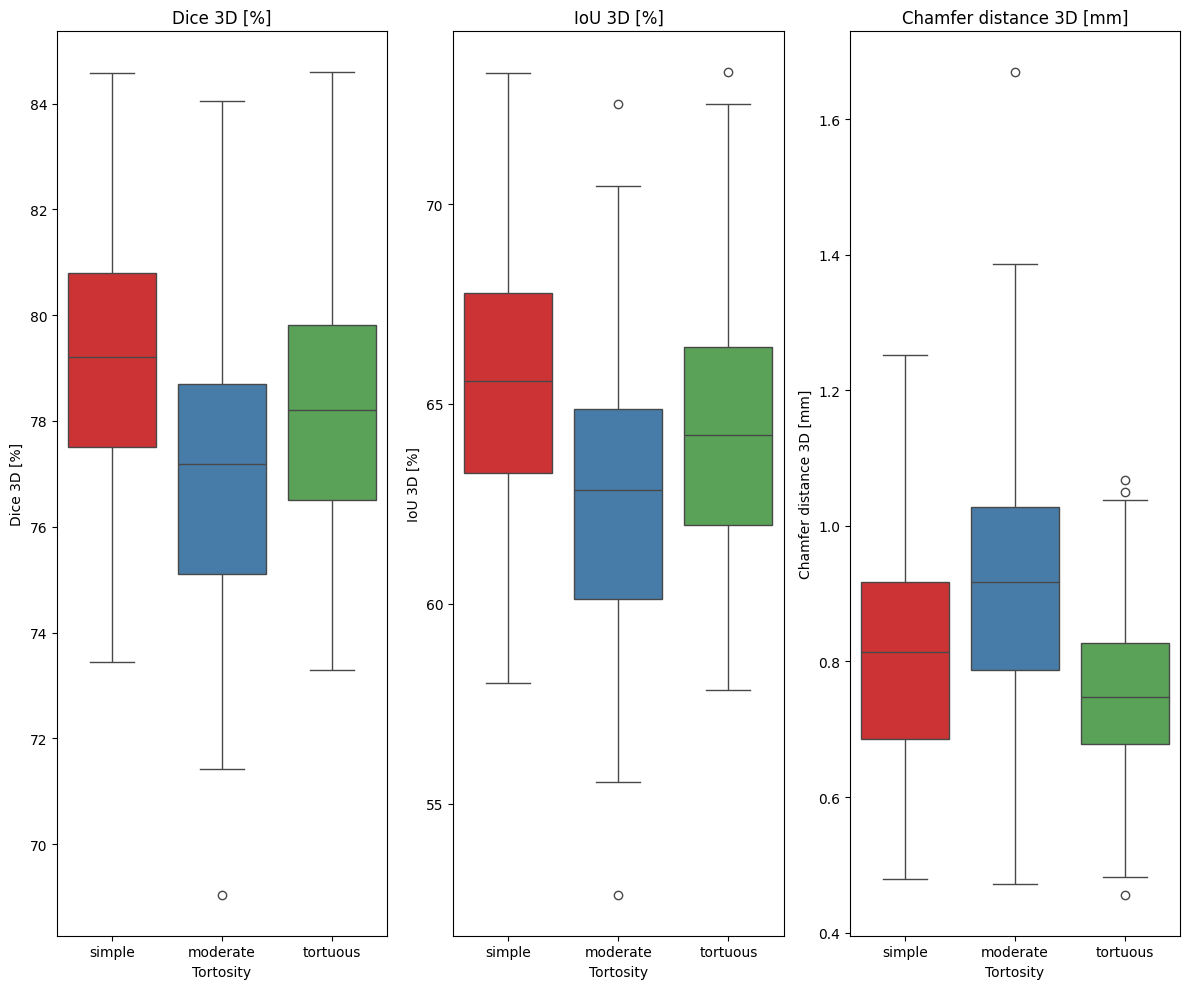

In [11]:
df_melted = pd.melt(df, id_vars=['tortosity'], value_vars=metrics,
                    var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 10))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='tortosity', y='Value', data=df_melted[df_melted['Metric'] == metric], palette='Set1')
    plt.title(metric)
    plt.xlabel('Tortosity')
    plt.ylabel(metric)
plt.tight_layout()
plt.savefig('figures/boxplot_general.png')
plt.show()